1. LOADING AND CLEANING DATA
Dataset shape: (6607, 20)
Initial missing values: 235
Found 1 impossible scores (>100). Removing them.
Final dataset shape: (6606, 20)
Missing values after cleaning: 0

2. DATA EXPLORATION AND VISUALIZATION


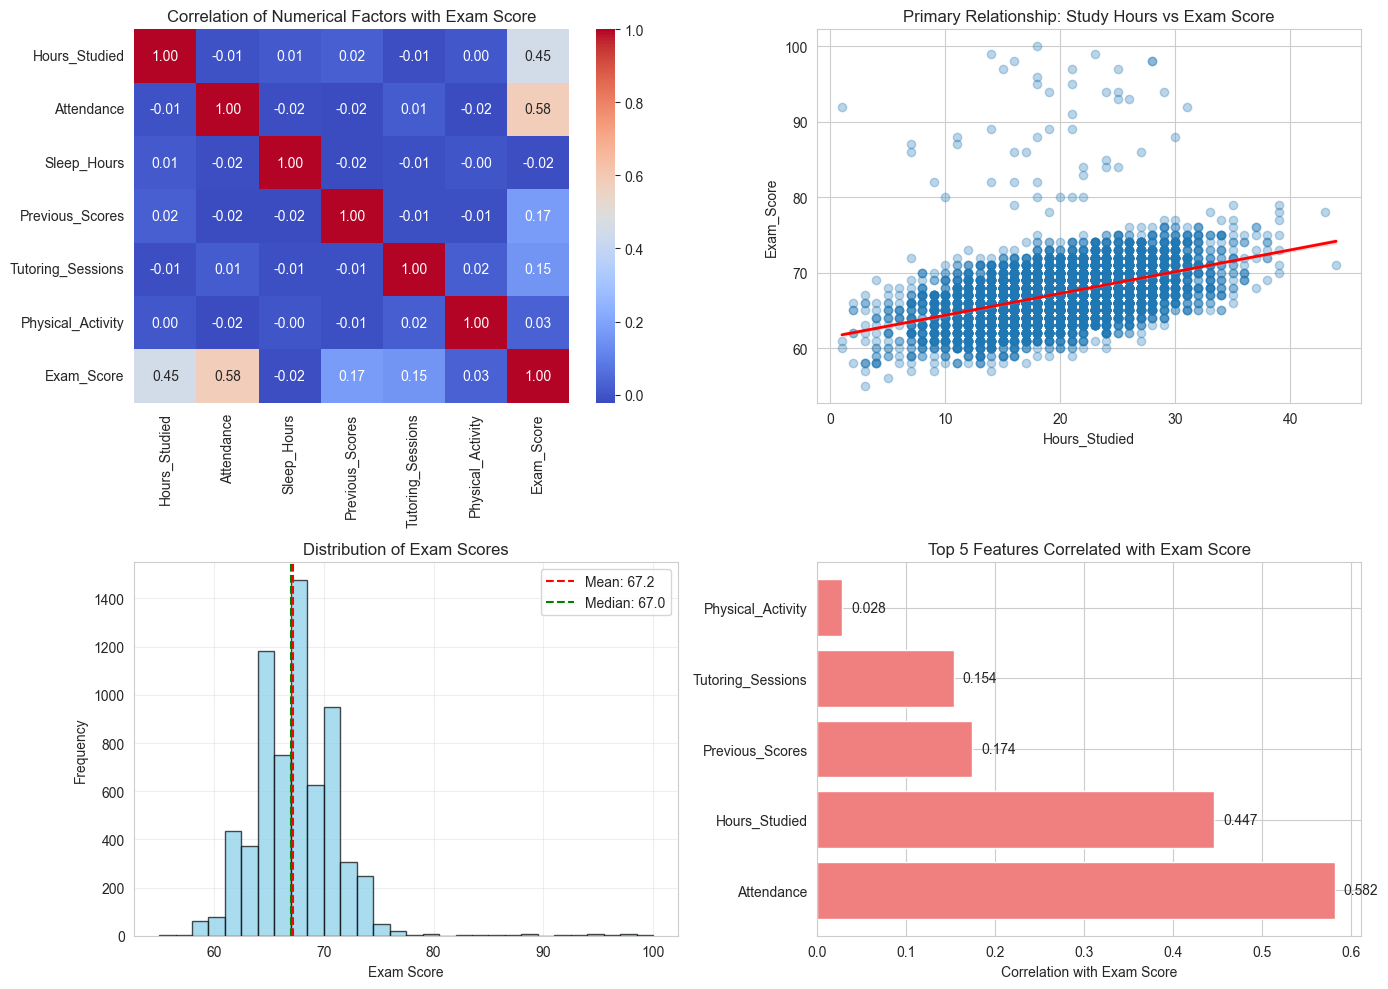


Top correlations with Exam_Score:
Attendance: 0.582
Hours_Studied: 0.447
Previous_Scores: 0.174
Tutoring_Sessions: 0.154
Physical_Activity: 0.028
Sleep_Hours: -0.016

3. SIMPLE LINEAR REGRESSION (Hours Studied Only)
Training samples: 5284
Testing samples: 1322

Model Equation: Exam_Score = 61.55 + 0.29 * Hours_Studied
R² Score: 0.2469
Mean Squared Error (MSE): 9.9598
Root Mean Squared Error (RMSE): 3.1559
Mean Absolute Error (MAE): 2.4190


/Users/harrisonekpobimi/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


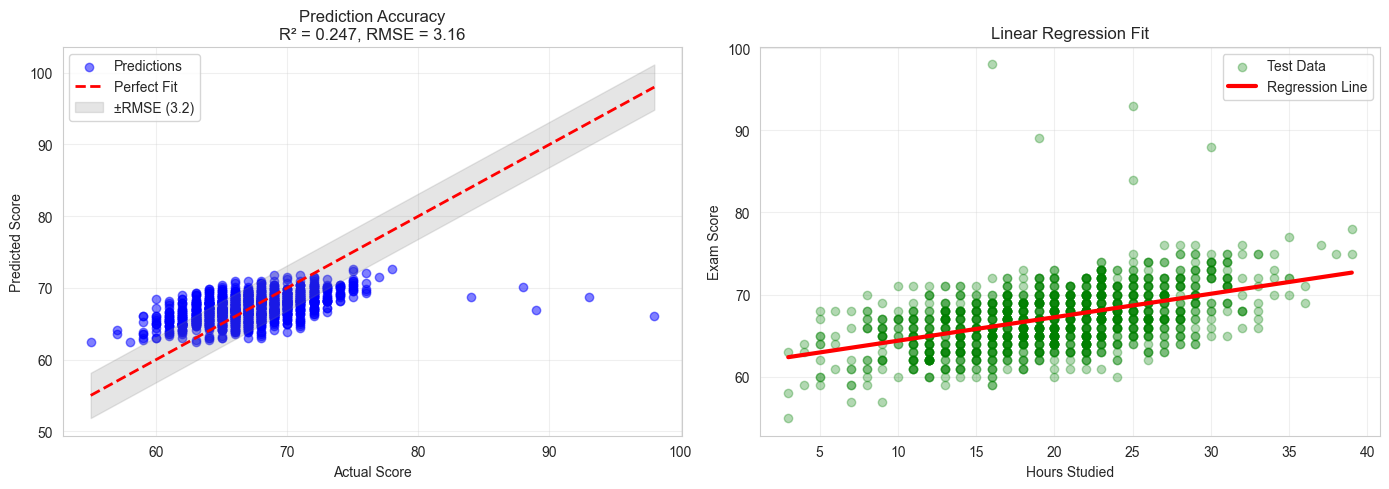


4. POLYNOMIAL REGRESSION (Degree 2)

Polynomial Regression Comparison:
----------------------------------------
Degree 1: R² = 0.2469, MSE = 9.9598
Degree 2: R² = 0.2479, MSE = 9.9464
Degree 3: R² = 0.2460, MSE = 9.9709
Degree 4: R² = 0.2453, MSE = 9.9802


/Users/harrisonekpobimi/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/harrisonekpobimi/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/harrisonekpobimi/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/harrisonekpobimi/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


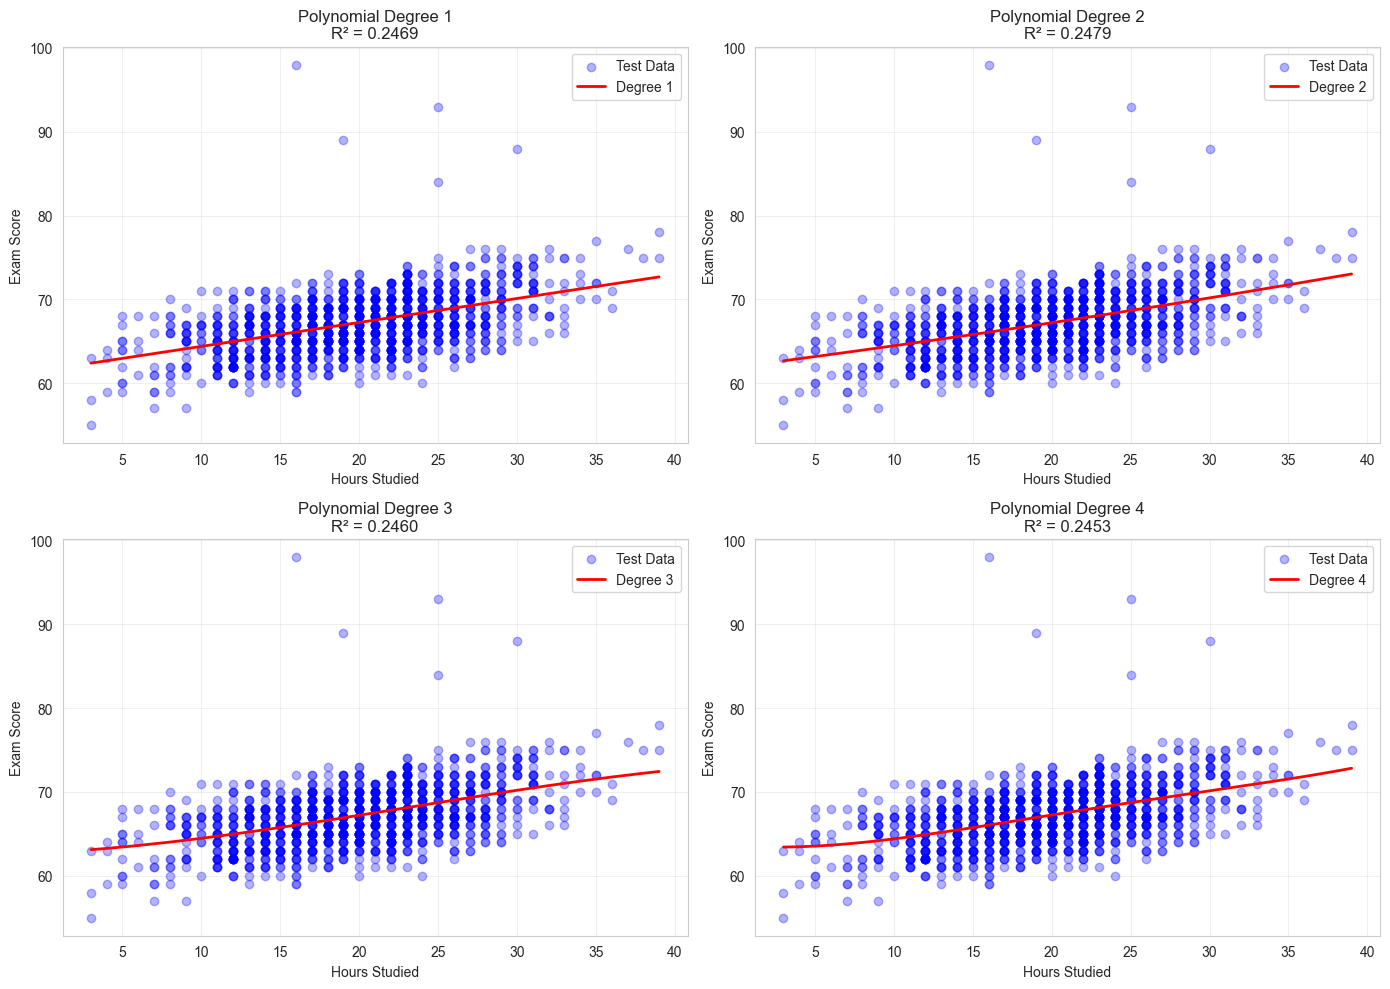


5. MULTI-FEATURE LINEAR REGRESSION

Set 1 (Hours Only):
  Features (1): Hours_Studied
  R² Score: 0.2469
  RMSE: 3.1559

Set 2 (Academic):
  Features (3): Hours_Studied, Previous_Scores, Attendance
  R² Score: 0.6554
  RMSE: 2.1346

Set 3 (Academic + Lifestyle):
  Features (4): Hours_Studied, Previous_Scores, Attendance...
  R² Score: 0.6555
  RMSE: 2.1343

Set 4 (All Numeric):
  Features (6): Hours_Studied, Previous_Scores, Attendance...
  R² Score: 0.6843
  RMSE: 2.0432

Set 5 (With Categorical):
  Features (9): Hours_Studied, Previous_Scores, Attendance...
  R² Score: 0.7331
  RMSE: 1.8788

BEST FEATURE SET: Set 5 (With Categorical)
R² Score: 0.7331
Features used: 9

6. FINAL MODEL COMPARISON

Model Performance Comparison:
----------------------------------------
                     Model  R2 Score     RMSE      MAE  Features
Simple Linear (Hours Only)  0.246854 3.155910 2.419018         1
     Polynomial (Degree 2)  0.247862 3.153797 2.415059         1
  Set 5 (With Categorical) 

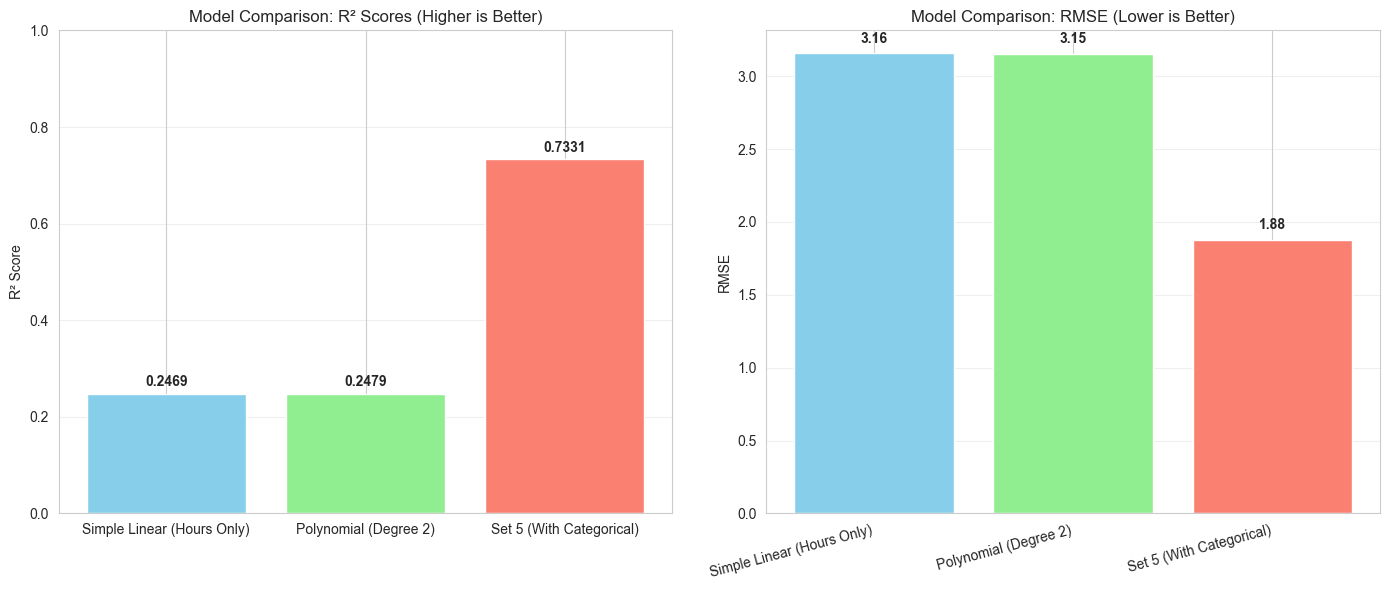


7. KEY INSIGHTS AND RECOMMENDATIONS

📊 KEY FINDINGS:
----------------------------------------
1. Study hours alone explain 24.7% of exam score variance
2. Previous scores are highly correlated with exam scores (r = 0.174)
3. Adding more features improves prediction accuracy by 48.6%
4. Polynomial regression (degree 2) offers minimal improvement over linear

✅ RECOMMENDATIONS:
----------------------------------------
1. For quick estimates: Use simple linear model with study hours only
2. For best accuracy: Use Set 5 (With Categorical) model
3. Key predictive features: Previous_Scores, Hours_Studied, Attendance
4. Monitor students with high study hours but low scores

📈 BUSINESS/EDUCATIONAL IMPLICATIONS:
----------------------------------------
• Focus on improving previous academic performance
• Study hours have diminishing returns after certain point
• Consider non-academic factors (sleep, motivation) for at-risk students
• Model can predict scores with ±1.9 points accuracy

8. SAVIN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# 1. LOAD AND CLEAN DATA
# ============================================================================
print("="*60)
print("1. LOADING AND CLEANING DATA")
print("="*60)

df = pd.read_csv("StudentPerformanceFactors.csv")
print(f"Dataset shape: {df.shape}")
print(f"Initial missing values: {df.isnull().sum().sum()}")

print(f"Information: {df.info()}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Stats: {df.describe()}")
print(f"Information: {df.info()}")
print(f"Check duplicates: {df.duplicated().sum()}")


# Check for impossible values in Exam_Score
impossible_scores = df[df['Exam_Score'] > 100]
if len(impossible_scores) > 0:
    print(f"Found {len(impossible_scores)} impossible scores (>100). Removing them.")
    df = df[df['Exam_Score'] <= 100]

# Impute missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
cols_to_fix = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
df[cols_to_fix] = cat_imputer.fit_transform(df[cols_to_fix])

print(f"Final dataset shape: {df.shape}")
print(f"Missing values after cleaning: {df.isnull().sum().sum()}")

# ============================================================================
# 2. BASIC VISUALIZATION (Understand the Dataset)
# ============================================================================
print("\n" + "="*60)
print("2. DATA EXPLORATION AND VISUALIZATION")
print("="*60)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Correlation Heatmap
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0, 0])
axes[0, 0].set_title("Correlation of Numerical Factors with Exam Score")

# Plot 2: Study Hours vs Exam Score
sns.regplot(x='Hours_Studied', y='Exam_Score', data=df,
            line_kws={'color':'red', 'linewidth':2},
            scatter_kws={'alpha':0.3}, ax=axes[0, 1])
axes[0, 1].set_title("Primary Relationship: Study Hours vs Exam Score")

# Plot 3: Distribution of Exam Scores
axes[1, 0].hist(df['Exam_Score'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[1, 0].axvline(df['Exam_Score'].mean(), color='red', linestyle='--',
                  label=f'Mean: {df["Exam_Score"].mean():.1f}')
axes[1, 0].axvline(df['Exam_Score'].median(), color='green', linestyle='--',
                  label=f'Median: {df["Exam_Score"].median():.1f}')
axes[1, 0].set_xlabel('Exam Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Exam Scores')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Top Correlated Features
exam_corr = corr_matrix['Exam_Score'].drop('Exam_Score').sort_values(ascending=False)
top_features = exam_corr.head(5)
axes[1, 1].barh(range(len(top_features)), top_features.values, color='lightcoral')
axes[1, 1].set_yticks(range(len(top_features)))
axes[1, 1].set_yticklabels(top_features.index)
axes[1, 1].set_xlabel('Correlation with Exam Score')
axes[1, 1].set_title('Top 5 Features Correlated with Exam Score')
for i, v in enumerate(top_features.values):
    axes[1, 1].text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.savefig('data_exploration.png')
plt.show()

print("\nTop correlations with Exam_Score:")
for feature, corr in exam_corr.items():
    print(f"{feature}: {corr:.3f}")

# ============================================================================
# 3. CORE TASK: SIMPLE LINEAR REGRESSION (Hours Studied)
# ============================================================================
print("\n" + "="*60)
print("3. SIMPLE LINEAR REGRESSION (Hours Studied Only)")
print("="*60)

X = df[['Hours_Studied']]
y = df['Exam_Score']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Train Model
lr_simple = LinearRegression()
lr_simple.fit(X_train, y_train)
y_pred_simple = lr_simple.predict(X_test)

# Get model details
coef = lr_simple.coef_[0]
intercept = lr_simple.intercept_

# Calculate metrics
r2_simple = r2_score(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)

print(f"\nModel Equation: Exam_Score = {intercept:.2f} + {coef:.2f} * Hours_Studied")
print(f"R² Score: {r2_simple:.4f}")
print(f"Mean Squared Error (MSE): {mse_simple:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_simple:.4f}")
print(f"Mean Absolute Error (MAE): {mae_simple:.4f}")

# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Predictions vs Actual
axes[0].scatter(y_test, y_pred_simple, alpha=0.5, color='blue', label='Predictions')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Fit')
axes[0].fill_between([y_test.min(), y_test.max()],
                     [y_test.min()-rmse_simple, y_test.max()-rmse_simple],
                     [y_test.min()+rmse_simple, y_test.max()+rmse_simple],
                     alpha=0.2, color='gray', label=f'±RMSE ({rmse_simple:.1f})')
axes[0].set_xlabel('Actual Score')
axes[0].set_ylabel('Predicted Score')
axes[0].set_title(f'Prediction Accuracy\nR² = {r2_simple:.3f}, RMSE = {rmse_simple:.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Regression line with data
axes[1].scatter(X_test, y_test, alpha=0.3, color='green', label='Test Data')
x_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_range = lr_simple.predict(x_range)
axes[1].plot(x_range, y_range, 'r-', lw=3, label='Regression Line')
axes[1].set_xlabel('Hours Studied')
axes[1].set_ylabel('Exam Score')
axes[1].set_title('Linear Regression Fit')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('simple_linear_results.png')
plt.show()

# ============================================================================
# 4. BONUS 1: POLYNOMIAL REGRESSION
# ============================================================================
print("\n" + "="*60)
print("4. POLYNOMIAL REGRESSION (Degree 2)")
print("="*60)

# Test multiple polynomial degrees
degrees = [1, 2, 3, 4]
poly_results = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)

    r2_poly = r2_score(y_test, y_pred_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)

    poly_results.append({
        'degree': degree,
        'r2': r2_poly,
        'mse': mse_poly,
        'model': poly_model,
        'features': poly_features
    })

    if degree == 2:
        # Store degree 2 results for comparison
        y_pred_poly_deg2 = y_pred_poly
        r2_poly_deg2 = r2_poly
        mse_poly_deg2 = mse_poly

# Compare polynomial degrees
print("\nPolynomial Regression Comparison:")
print("-"*40)
for result in poly_results:
    print(f"Degree {result['degree']}: R² = {result['r2']:.4f}, MSE = {result['mse']:.4f}")

# Visualize polynomial fits
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, result in enumerate(poly_results):
    ax = axes[i]

    # Sort for smooth plotting
    sort_idx = X_test.values.flatten().argsort()
    X_sorted = X_test.values[sort_idx].flatten()
    y_test_sorted = y_test.values[sort_idx]
    y_pred_sorted = result['model'].predict(
        result['features'].transform(X_sorted.reshape(-1, 1))
    )

    ax.scatter(X_sorted, y_test_sorted, alpha=0.3, color='blue', label='Test Data')
    ax.plot(X_sorted, y_pred_sorted, 'r-', lw=2, label=f'Degree {result["degree"]}')
    ax.set_xlabel('Hours Studied')
    ax.set_ylabel('Exam Score')
    ax.set_title(f'Polynomial Degree {result["degree"]}\nR² = {result["r2"]:.4f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('polynomial_comparison.png')
plt.show()

# ============================================================================
# 5. BONUS 2: EXPERIMENT WITH FEATURE COMBINATIONS (Advanced Model)
# ============================================================================
print("\n" + "="*60)
print("5. MULTI-FEATURE LINEAR REGRESSION")
print("="*60)

# Define different feature combinations to test
feature_sets = {
    'Set 1 (Hours Only)': ['Hours_Studied'],
    'Set 2 (Academic)': ['Hours_Studied', 'Previous_Scores', 'Attendance'],
    'Set 3 (Academic + Lifestyle)': ['Hours_Studied', 'Previous_Scores', 'Attendance', 'Sleep_Hours'],
    'Set 4 (All Numeric)': ['Hours_Studied', 'Previous_Scores', 'Attendance',
                           'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity'],
    'Set 5 (With Categorical)': ['Hours_Studied', 'Previous_Scores', 'Attendance',
                                'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity',
                                'Motivation_Level', 'Internet_Access', 'Parental_Involvement']
}

multi_results = []

for set_name, features in feature_sets.items():
    # Separate numeric and categorical features
    num_cols = [f for f in features if f in df.select_dtypes(include=[np.number]).columns]
    cat_cols = [f for f in features if f in df.select_dtypes(include=['object']).columns]

    X_multi = df[features].copy()

    # Split the data
    X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
        X_multi, y, test_size=0.2, random_state=42
    )

    # Create preprocessing pipeline
    if cat_cols:
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', 'passthrough', num_cols),
                ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
            ])
    else:
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', 'passthrough', num_cols)
            ])

    # Create model pipeline
    if len(features) > 1:
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])
    else:
        model_pipeline = LinearRegression()

    # Train and predict
    if len(features) > 1:
        model_pipeline.fit(X_train_m, y_train_m)
        y_pred_multi = model_pipeline.predict(X_test_m)
    else:
        model_pipeline.fit(X_train_m, y_train_m)
        y_pred_multi = model_pipeline.predict(X_test_m)

    # Calculate metrics
    r2_multi = r2_score(y_test_m, y_pred_multi)
    mse_multi = mean_squared_error(y_test_m, y_pred_multi)
    rmse_multi = np.sqrt(mse_multi)

    multi_results.append({
        'name': set_name,
        'features': features,
        'r2': r2_multi,
        'mse': mse_multi,
        'rmse': rmse_multi,
        'model': model_pipeline
    })

    print(f"\n{set_name}:")
    print(f"  Features ({len(features)}): {', '.join(features[:3])}{'...' if len(features) > 3 else ''}")
    print(f"  R² Score: {r2_multi:.4f}")
    print(f"  RMSE: {rmse_multi:.4f}")

# Find the best feature set
best_result = max(multi_results, key=lambda x: x['r2'])
print(f"\n{'='*40}")
print(f"BEST FEATURE SET: {best_result['name']}")
print(f"R² Score: {best_result['r2']:.4f}")
print(f"Features used: {len(best_result['features'])}")

# ============================================================================
# 6. FINAL PERFORMANCE COMPARISON
# ============================================================================
print("\n" + "="*60)
print("6. FINAL MODEL COMPARISON")
print("="*60)

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Model': [
        'Simple Linear (Hours Only)',
        'Polynomial (Degree 2)',
        best_result['name']
    ],
    'R2 Score': [
        r2_simple,
        r2_poly_deg2,
        best_result['r2']
    ],
    'RMSE': [
        rmse_simple,
        np.sqrt(mse_poly_deg2),
        best_result['rmse']
    ],
    'MAE': [
        mae_simple,
        mean_absolute_error(y_test, y_pred_poly_deg2),
        mean_absolute_error(y_test_m, model_pipeline.predict(X_test_m))
    ],
    'Features': [
        1, 1, len(best_result['features'])
    ]
})

print("\nModel Performance Comparison:")
print("-"*40)
print(comparison.to_string(index=False))

# Visual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for R2 scores
bars1 = ax1.bar(comparison['Model'], comparison['R2 Score'],
               color=['skyblue', 'lightgreen', 'salmon'])
ax1.set_ylabel('R² Score')
ax1.set_title('Model Comparison: R² Scores (Higher is Better)')
ax1.set_ylim([0, 1])
ax1.grid(True, alpha=0.3, axis='y')
for bar, r2 in zip(bars1, comparison['R2 Score']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f'{r2:.4f}', ha='center', va='bottom', fontweight='bold')

# Bar plot for RMSE
bars2 = ax2.bar(comparison['Model'], comparison['RMSE'],
               color=['skyblue', 'lightgreen', 'salmon'])
ax2.set_ylabel('RMSE')
ax2.set_title('Model Comparison: RMSE (Lower is Better)')
ax2.grid(True, alpha=0.3, axis='y')
for bar, rmse in zip(bars2, comparison['RMSE']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.05,
             f'{rmse:.2f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.savefig('final_model_comparison.png')
plt.show()

# ============================================================================
# 7. INSIGHTS AND RECOMMENDATIONS
# ============================================================================
print("\n" + "="*60)
print("7. KEY INSIGHTS AND RECOMMENDATIONS")
print("="*60)

print("\n📊 KEY FINDINGS:")
print("-"*40)
print(f"1. Study hours alone explain {r2_simple*100:.1f}% of exam score variance")
print(f"2. Previous scores are highly correlated with exam scores (r = {exam_corr['Previous_Scores']:.3f})")
print(f"3. Adding more features improves prediction accuracy by {(best_result['r2'] - r2_simple)*100:.1f}%")
print(f"4. Polynomial regression (degree 2) offers minimal improvement over linear")

print("\n✅ RECOMMENDATIONS:")
print("-"*40)
print("1. For quick estimates: Use simple linear model with study hours only")
print(f"2. For best accuracy: Use {best_result['name']} model")
print("3. Key predictive features: Previous_Scores, Hours_Studied, Attendance")
print("4. Monitor students with high study hours but low scores")

print("\n📈 BUSINESS/EDUCATIONAL IMPLICATIONS:")
print("-"*40)
print("• Focus on improving previous academic performance")
print("• Study hours have diminishing returns after certain point")
print("• Consider non-academic factors (sleep, motivation) for at-risk students")
print(f"• Model can predict scores with ±{best_result['rmse']:.1f} points accuracy")

# ============================================================================
# 8. SAVE FINAL MODEL (Optional)
# ============================================================================
print("\n" + "="*60)
print("8. SAVING FINAL MODEL")
print("="*60)

import joblib

# Save the best model
best_model = best_result['model']
joblib.dump(best_model, 'best_student_score_model.pkl')
print("✓ Best model saved as 'best_student_score_model.pkl'")

# Save comparison results
comparison.to_csv('model_comparison_results.csv', index=False)
print("✓ Comparison results saved as 'model_comparison_results.csv'")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)